In [1]:
from google.colab import files
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from google.colab import files


# 파일 업로드 창 열기
uploaded = files.upload()

Saving Loan_Default.csv to Loan_Default.csv


In [2]:
# 업로드한 파일 읽어서 DataFrame으로 저장
for file_name in uploaded.keys():
    df = pd.read_csv(file_name)  # CSV 파일인 경우
    # Excel 파일인 경우: df = pd.read_excel(file_name)

# DataFrame의 상위 5개 행 출력
print(df.head())


      ID  year loan_limit             Gender approv_in_adv loan_type  \
0  24890  2019         cf  Sex Not Available         nopre     type1   
1  24891  2019         cf               Male         nopre     type2   
2  24892  2019         cf               Male           pre     type1   
3  24893  2019         cf               Male         nopre     type1   
4  24894  2019         cf              Joint           pre     type1   

  loan_purpose Credit_Worthiness open_credit business_or_commercial  ...  \
0           p1                l1        nopc                  nob/c  ...   
1           p1                l1        nopc                    b/c  ...   
2           p1                l1        nopc                  nob/c  ...   
3           p4                l1        nopc                  nob/c  ...   
4           p1                l1        nopc                  nob/c  ...   

   credit_type  Credit_Score  co-applicant_credit_type    age  \
0          EXP           758                 

In [3]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report


# CSV 파일에서 데이터 불러오기
df = pd.read_csv('Loan_Default.csv')

# K-means 군집화를 위해 신용 점수 데이터 준비 (2차원 배열로 변환)
credit_scores = df['Credit_Score'].values.reshape(-1, 1)

# 데이터 표준화를 위한 스케일러 생성
scaler = StandardScaler()
credit_scores_scaled = scaler.fit_transform(credit_scores)

# K-means 군집화 수행 (3개의 클러스터로 분할)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Credit_Score_Cluster'] = kmeans.fit_predict(credit_scores_scaled)

# 군집 중심점을 기반으로 레이블 할당
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_order = np.argsort(cluster_centers.flatten())
cluster_labels = ['Low', 'Medium', 'High']
cluster_mapping = {cluster_order[i]: cluster_labels[i] for i in range(3)}
df['Credit_Score_Category'] = df['Credit_Score_Cluster'].map(cluster_mapping)

군집 중심점:
군집 0 중심점: 834.11
군집 1 중심점: 567.05
군집 2 중심점: 700.77

각 군집별 통계:

Low 군집 통계:
개수: 49855
평균 신용 점수: 566.54
신용 점수 범위: 500.00 - 633.00

Medium 군집 통계:
개수: 49533
평균 신용 점수: 700.26
신용 점수 범위: 634.00 - 767.00

High 군집 통계:
개수: 49282
평균 신용 점수: 834.11
신용 점수 범위: 768.00 - 900.00


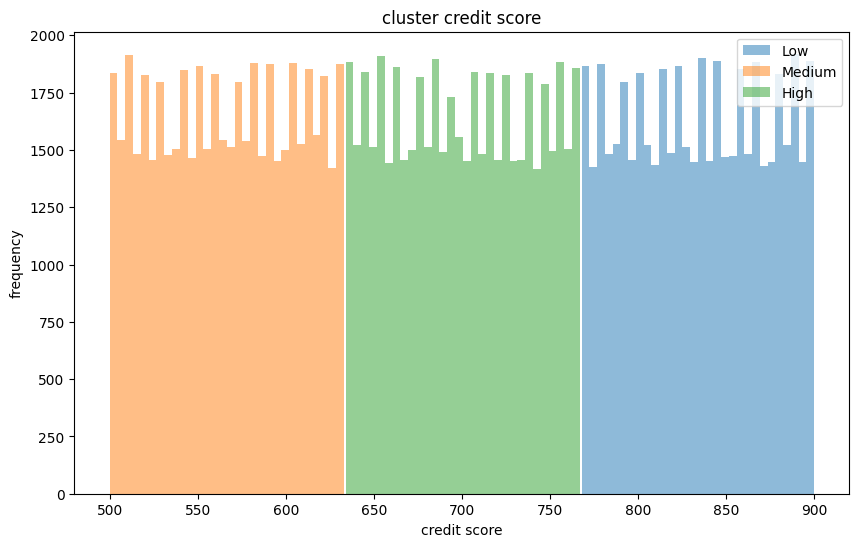

In [4]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# CSV 파일에서 데이터 불러오기
df = pd.read_csv('Loan_Default.csv')

# K-means 군집화를 위해 신용 점수 데이터 준비 (2차원 배열로 변환)
credit_scores = df['Credit_Score'].values.reshape(-1, 1)

# 데이터 표준화를 위한 스케일러 생성
scaler = StandardScaler()
credit_scores_scaled = scaler.fit_transform(credit_scores)

# K-means 군집화 수행 (3개의 클러스터로 분할)
kmeans = KMeans(n_clusters=3, random_state=42)
df['Credit_Score_Cluster'] = kmeans.fit_predict(credit_scores_scaled)

# 군집 중심점을 기반으로 레이블 할당
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_order = np.argsort(cluster_centers.flatten())
cluster_labels = ['Low', 'Medium', 'High']
cluster_mapping = {cluster_order[i]: cluster_labels[i] for i in range(3)}
df['Credit_Score_Category'] = df['Credit_Score_Cluster'].map(cluster_mapping)

# 결과 분석
print("군집 중심점:")
for i, center in enumerate(cluster_centers):
    print(f"군집 {i} 중심점: {center[0]:.2f}")

print("\n각 군집별 통계:")
for label in cluster_labels:
    cluster_data = df[df['Credit_Score_Category'] == label]
    print(f"\n{label} 군집 통계:")
    print(f"개수: {len(cluster_data)}")
    print(f"평균 신용 점수: {cluster_data['Credit_Score'].mean():.2f}")
    print(f"신용 점수 범위: {cluster_data['Credit_Score'].min():.2f} - {cluster_data['Credit_Score'].max():.2f}")

# 군집 분포 시각화
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
df.groupby('Credit_Score_Category')['Credit_Score'].plot(kind='hist', alpha=0.5, bins=30)
plt.title('cluster credit score')
plt.xlabel('credit score')
plt.ylabel('frequency')
plt.legend(cluster_labels)
plt.show()

In [5]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix

# 데이터 불러오기 및 전처리
df = pd.read_csv('Loan_Default.csv')

# K-means 군집화를 위해 신용 점수 데이터 준비
credit_scores = df['Credit_Score'].values.reshape(-1, 1)
scaler = StandardScaler()
credit_scores_scaled = scaler.fit_transform(credit_scores)

# 군집 레이블 재현
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
df['Credit_Score_Cluster'] = kmeans.fit_predict(credit_scores_scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_order = np.argsort(cluster_centers.flatten())
cluster_labels = ['Low', 'Medium', 'High']
cluster_mapping = {cluster_order[i]: cluster_labels[i] for i in range(3)}
df['Credit_Score_Category'] = df['Credit_Score_Cluster'].map(cluster_mapping)

# 범주형 변수 인코딩
categorical_columns = ['Gender', 'loan_type', 'loan_purpose', 'credit_type', 'age']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

# 예측 모델 결과를 저장할 딕셔너리
prediction_results = {}

# 각 신용 점수 군집별 예측 모델 학습
for category in ['Low', 'Medium', 'High']:
    # 해당 군집 데이터 필터링
    category_data = df[df['Credit_Score_Category'] == category]

    # 특징 선택
    features = ['Credit_Score', 'LTV', 'dtir1'] + [col + '_encoded' for col in categorical_columns]

    # 데이터 분할
    X = category_data[features]
    y = category_data['Status']

    # 훈련/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 랜덤 포레스트 분류기 학습
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = rf_classifier.predict(X_test)

    # 결과 저장
    prediction_results[category] = {
        'model': rf_classifier,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'feature_importance': dict(zip(features, rf_classifier.feature_importances_))
    }

# 각 군집별 예측 결과 출력
for category, results in prediction_results.items():
    print(f"\n{category} Credit Score Cluster Prediction Results:")
    print("Classification Report:")
    print(results['classification_report'])

    print("\nConfusion Matrix:")
    print(results['confusion_matrix'])

    print("\nFeature Importance:")
    for feature, importance in sorted(results['feature_importance'].items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {importance:.4f}")

# 새로운 데이터에 대한 예측 함수
def predict_loan_default(credit_score, cluster, **kwargs):
    """
    주어진 신용점수 군집에 대한 대출 파산 예측

    :param credit_score: 신청자의 신용 점수
    :param cluster: 신용점수 군집 ('Low', 'Medium', 'High')
    :param kwargs: 예측에 필요한 추가 특징
    :return: 대출 파산 예측 결과
    """
    if cluster not in prediction_results:
        raise ValueError(f"Invalid cluster. Choose from: {list(prediction_results.keys())}")

    # 필요한 특징 준비
    le = LabelEncoder()
    input_features = {
        'Credit_Score': credit_score,
        'LTV': kwargs.get('LTV', df['LTV'].mean()),
        'dtir1': kwargs.get('dtir1', df['dtir1'].mean())
    }

    # 범주형 변수 인코딩
    for col in ['Gender', 'loan_type', 'loan_purpose', 'credit_type', 'age']:
        input_features[col + '_encoded'] = le.fit_transform([str(kwargs.get(col, df[col].mode()[0]))])[0]

    # 특징 순서 맞추기
    features = ['Credit_Score', 'LTV', 'dtir1'] + [col + '_encoded' for col in ['Gender', 'loan_type', 'loan_purpose', 'credit_type', 'age']]

    # 모델을 사용하여 예측
    model = prediction_results[cluster]['model']
    input_data = np.array([input_features[f] for f in features]).reshape(1, -1)

    return model.predict(input_data)[0]


Low Credit Score Cluster Prediction Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.92      7577
           1       0.92      0.54      0.68      2394

    accuracy                           0.88      9971
   macro avg       0.90      0.76      0.80      9971
weighted avg       0.88      0.88      0.87      9971


Confusion Matrix:
[[7469  108]
 [1106 1288]]

Feature Importance:
LTV: 0.4119
dtir1: 0.2232
Credit_Score: 0.1547
credit_type_encoded: 0.0728
age_encoded: 0.0468
loan_type_encoded: 0.0348
loan_purpose_encoded: 0.0324
Gender_encoded: 0.0234

Medium Credit Score Cluster Prediction Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.99      0.93      7480
           1       0.92      0.55      0.69      2427

    accuracy                           0.88      9907
   macro avg       0.90      0.77      0.81      9907
weighted avg       0

In [6]:
# 데이터프레임 열 이름 확인
print("DataFrame columns:", df.columns)

DataFrame columns: Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1', 'Credit_Score_Cluster', 'Credit_Score_Category',
       'Gender_encoded', 'loan_type_encoded', 'loan_purpose_encoded',
       'credit_type_encoded', 'age_encoded'],
      dtype='object')


In [7]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.cluster import KMeans

# 데이터 불러오기
df = pd.read_csv('Loan_Default.csv')

# 데이터 확인
print("DataFrame columns:", df.columns)

# `age` 열 변환: 문자열 범위를 숫자로 변환
def age_to_numeric(age_range):
    try:
        lower, upper = map(int, age_range.split('-'))
        return (lower + upper) // 2  # 중앙값 반환
    except:
        return np.nan  # 변환 실패 시 NaN 처리

df['age'] = df['age'].apply(age_to_numeric)

# NaN이 있다면 평균값으로 채우기
df['age'] = df['age'].fillna(df['age'].mean())

# K-means 군집화를 위해 신용 점수 데이터 준비
credit_scores = df['Credit_Score'].values.reshape(-1, 1)
scaler = StandardScaler()
credit_scores_scaled = scaler.fit_transform(credit_scores)

# K-means 군집화
kmeans = KMeans(n_clusters=3, random_state=42)
df['Credit_Score_Cluster'] = kmeans.fit_predict(credit_scores_scaled)
cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
cluster_order = np.argsort(cluster_centers.flatten())
cluster_labels = ['Low', 'Medium', 'High']
cluster_mapping = {cluster_order[i]: cluster_labels[i] for i in range(3)}
df['Credit_Score_Category'] = df['Credit_Score_Cluster'].map(cluster_mapping)

# 범주형 변수 인코딩
categorical_columns = ['Gender', 'loan_type', 'loan_purpose', 'credit_type']
le = LabelEncoder()
for col in categorical_columns:
    df[col + '_encoded'] = le.fit_transform(df[col].astype(str))

# 범주형 나이 데이터 인코딩
df['age_encoded'] = le.fit_transform(df['age'].astype(str))

# 예측 모델 결과를 저장할 딕셔너리
prediction_results = {}

# 주요 피쳐 추출
features_to_include = ['Credit_Score', 'property_value', 'age_encoded', 'loan_amount', 'LTV', 'income', 'dtir1']

# 각 신용 점수 군집별 예측 모델 학습
for category in ['Low', 'Medium', 'High']:
    # 해당 군집 데이터 필터링
    category_data = df[df['Credit_Score_Category'] == category]

    # 특징 선택
    features = features_to_include + [col + '_encoded' for col in categorical_columns]

    # 데이터 분할
    X = category_data[features]
    y = category_data['Status']

    # 훈련/테스트 데이터 분할
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # 랜덤 포레스트 분류기 학습
    rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_classifier.fit(X_train, y_train)

    # 예측 및 평가
    y_pred = rf_classifier.predict(X_test)

    # 결과 저장
    prediction_results[category] = {
        'model': rf_classifier,
        'classification_report': classification_report(y_test, y_pred),
        'confusion_matrix': confusion_matrix(y_test, y_pred),
        'feature_importance': dict(zip(features, rf_classifier.feature_importances_))
    }

# 각 군집별 예측 결과 출력
for category, results in prediction_results.items():
    print(f"\n{category} Credit Score Cluster Prediction Results:")
    print("Classification Report:")
    print(results['classification_report'])

    print("\nConfusion Matrix:")
    print(results['confusion_matrix'])

    print("\nFeature Importance:")
    for feature, importance in sorted(results['feature_importance'].items(), key=lambda x: x[1], reverse=True):
        print(f"{feature}: {importance:.4f}")

# 새로운 데이터에 대한 예측 함수
def predict_loan_default(cluster, **kwargs):
    """
    주어진 신용 점수 군집에 대한 대출 파산 예측

    :param cluster: 신용 점수 군집 ('Low', 'Medium', 'High')
    :param kwargs: 예측에 필요한 추가 특징
    :return: 대출 파산 예측 결과
    """
    if cluster not in prediction_results:
        raise ValueError(f"Invalid cluster. Choose from: {list(prediction_results.keys())}")

    # 필요한 특징 준비
    input_features = {
        'Credit_Score': kwargs.get('Credit_Score', df['Credit_Score'].mean()),
        'property_value': kwargs.get('property_value', df['property_value'].mean()),
        'age_encoded': le.fit_transform([str(kwargs.get('age', df['age'].mode()[0]))])[0],
        'loan_amount': kwargs.get('loan_amount', df['loan_amount'].mean()),
        'LTV': kwargs.get('LTV', df['LTV'].mean()),
        'income': kwargs.get('income', df['income'].mean()),
        'dtir1': kwargs.get('dtir1', df['dtir1'].mean())
    }

    # 범주형 변수 인코딩
    for col in ['Gender', 'loan_type', 'loan_purpose', 'credit_type']:
        input_features[col + '_encoded'] = le.fit_transform([str(kwargs.get(col, df[col].mode()[0]))])[0]

    # 특징 순서 맞추기
    features = features_to_include + [col + '_encoded' for col in categorical_columns]

    # 모델을 사용하여 예측
    model = prediction_results[cluster]['model']
    input_data = np.array([input_features[f] for f in features]).reshape(1, -1)

    return model.predict(input_data)[0]


DataFrame columns: Index(['ID', 'year', 'loan_limit', 'Gender', 'approv_in_adv', 'loan_type',
       'loan_purpose', 'Credit_Worthiness', 'open_credit',
       'business_or_commercial', 'loan_amount', 'rate_of_interest',
       'Interest_rate_spread', 'Upfront_charges', 'term', 'Neg_ammortization',
       'interest_only', 'lump_sum_payment', 'property_value',
       'construction_type', 'occupancy_type', 'Secured_by', 'total_units',
       'income', 'credit_type', 'Credit_Score', 'co-applicant_credit_type',
       'age', 'submission_of_application', 'LTV', 'Region', 'Security_Type',
       'Status', 'dtir1'],
      dtype='object')

Low Credit Score Cluster Prediction Results:
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.99      0.93      7577
           1       0.94      0.56      0.70      2394

    accuracy                           0.89      9971
   macro avg       0.91      0.78      0.82      9971
weighted avg       0

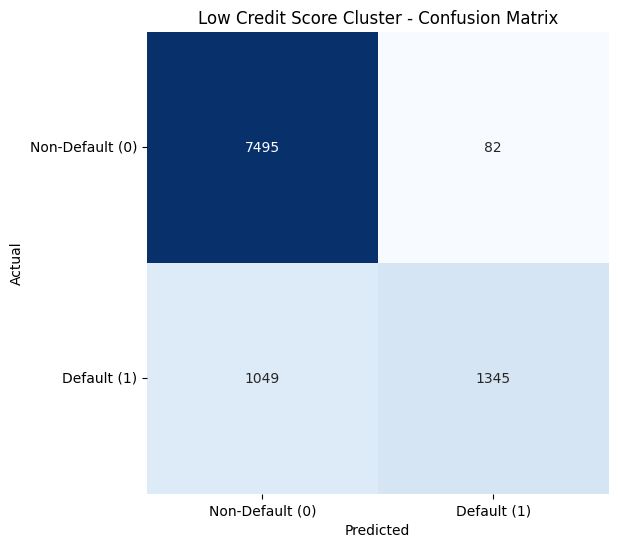

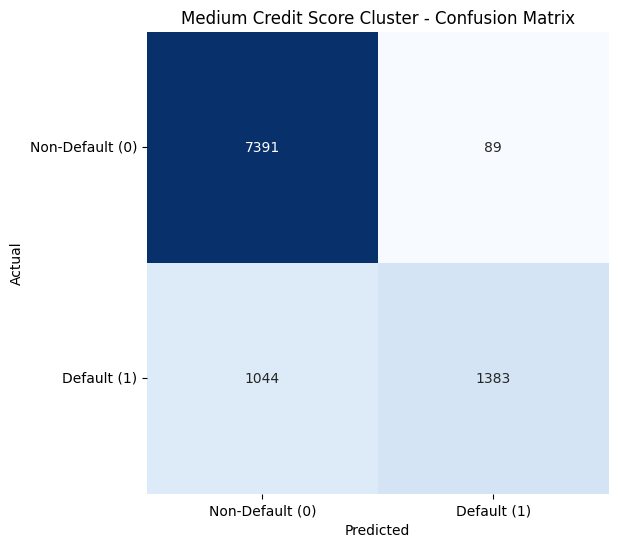

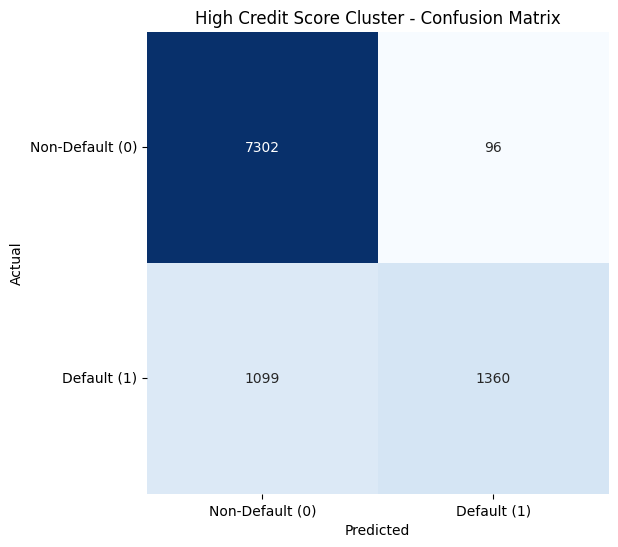

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Confusion Matrices for each cluster
confusion_matrices = {
    "Low": [[7495, 82], [1049, 1345]],
    "Medium": [[7391, 89], [1044, 1383]],
    "High": [[7302, 96], [1099, 1360]]
}

# Function to plot confusion matrix
def plot_confusion_matrix(cm, cluster_name):
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, square=True)
    plt.title(f"{cluster_name} Credit Score Cluster - Confusion Matrix")
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.xticks([0.5, 1.5], ['Non-Default (0)', 'Default (1)'])
    plt.yticks([0.5, 1.5], ['Non-Default (0)', 'Default (1)'], rotation=0)
    plt.show()

# Plot confusion matrices for each cluster
for cluster, cm in confusion_matrices.items():
    plot_confusion_matrix(cm, cluster)


신용점수 750, medium인 고객의 파산여부 예측 예시

In [ ]:
# 예측 함수 사용 예시
print("\nPrediction Function Example:")
example_prediction = predict_loan_default(
    credit_score=750,
    cluster='Medium',
    LTV=80,
    dtir1=40,
    Gender='Male',
    loan_type='type1',
    loan_purpose='p1',
    credit_type='EXP',
    age='35-44'
)
print(f"Predicted Loan Default Status: {example_prediction}")


Prediction Function Example:
Predicted Loan Default Status: 0


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


In [10]:
# Low 신용 점수 군집에서 높은 파산 위험 시나리오
high_default_risk_low_score = predict_loan_default(
    cluster='Low',            # 'Low' 군집
    credit_score=400,         # 매우 낮은 신용 점수
    property_value=100000,    # 낮은 자산 가치
    age_encoded=1,            # 25-34 연령대, 상대적으로 안정성 낮음
    loan_amount=95000,        # 대출 금액 (LTV 95% 반영)
    LTV=95,                   # 높은 대출 대 가치 비율
    income=3000,              # 낮은 월 소득
    dtir1=65                  # 높은 부채 대 소득 비율
)
print(f"신용등급이 Low인 고객의 파산여부: {high_default_risk_low_score}")

# Medium 신용 점수 군집에서 높은 파산 위험 시나리오
medium_default_risk = predict_loan_default(
    cluster='Medium',         # 'Medium' 군집
    credit_score=600,         # 중간 정도의 낮은 신용 점수
    property_value=200000,    # 중간 정도의 자산 가치
    age_encoded=2,            # 35-44 연령대
    loan_amount=180000,       # 대출 금액 (LTV 90% 반영)
    LTV=90,                   # 높은 대출 대 가치 비율
    income=5000,              # 중간 수준의 월 소득
    dtir1=55                  # 높은 부채 대 소득 비율
)
print(f"신용등급이 Medium인 고객의 파산여부: {medium_default_risk}")

# High 신용 점수 군집에서 높은 파산 위험 시나리오
high_default_risk = predict_loan_default(
    cluster='High',           # 'High' 군집
    credit_score=700,         # 상대적으로 높은 신용 점수
    property_value=300000,    # 높은 자산 가치
    age_encoded=3,            # 45-54 연령대
    loan_amount=255000,       # 대출 금액 (LTV 85% 반영)
    LTV=85,                   # 높은 대출 대 가치 비율
    income=8000,              # 높은 월 소득
    dtir1=60                  # 높은 부채 대 소득 비율
)
print(f"신용등급이 High인 고객의 파산여부: {high_default_risk}")


신용등급이 Low인 고객의 파산여부: 1
신용등급이 Medium인 고객의 파산여부: 1
신용등급이 High인 고객의 파산여부: 1


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(
